In [2]:
%matplotlib notebook
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
l1,l2,h1,h2,d1,d2,k_theta,k_phi,k_L, x1,x2,x3 = sm.symbols("l1,l2,h1,h2,d1,d2,k_theta,k_phi,k_L, x1,x2,x3")

In [4]:
L1 = sm.sqrt(l1**2 + h1**2)
th0 = sm.atan(h1/l1)
th = sm.atan((h1-d1)/l1)

d2 = 2*(sm.sqrt(l1**2+h1**2-(h1-d1)**2)-l1)
ph0 = sm.atan(h2/l2)
ph = sm.atan((h2-d2)/l2)

l3_0 = sm.sqrt(l2**2+h2**2);
l3= sm.sqrt(l2**2+(h2-d2)**2)

PE1 = 2*k_theta*(th0-th)**2;
PE2 = 1/2*k_phi*(ph0-ph)**2;
PE3 = 1/2*k_L*(l3_0-l3)**2

PE = PE1+PE2+PE3

repl = {l1:10,
        l2:0.4,
        h1:4,
        h2:0.8,
        k_theta:1,
        k_phi:1,
        k_L:1,
        d1:0}
c = sm.cos
s = sm.sin


In [5]:
F = PE.diff(d1).xreplace(repl)
PEl= sm.lambdify(d1,PE.xreplace(repl))
Fl= sm.lambdify(d1,F)

def evaluate(
        l1_v=10,
        l2_v=0.4,
        h1_v=4,
        h2_v=0.8,
        k_theta_v=1,
        k_phi_v=1,
        k_L_v=1,
        d1_v =0):
    
    repl = {l1:l1_v,l2:l2_v,h1:h1_v,h2:h2_v,k_theta:k_theta_v,k_phi:k_phi_v,k_L:k_L_v,d1:d1_v}
    
    xs = [0,L1*c(th),2*L1*c(th),2*l1+h2,2*L1*c(th),2*l1+h2]
    ys = [0,h1-d1,0,l2,0,-l2]
    
    xs = np.array(sm.Matrix(xs).xreplace(repl).evalf()).astype(np.float64).squeeze()
    ys = np.array(sm.Matrix(ys).xreplace(repl).evalf()).astype(np.float64).squeeze()
    F =  PE.diff(d1).xreplace(repl).evalf()
    PEl = PE.xreplace(repl).evalf()
    return {'x':xs,'y': ys, 'F':F, 'PE': PEl}



evaluate()['y']


array([ 0. ,  4. ,  0. ,  0.4,  0. , -0.4])

<IPython.core.display.Javascript object>


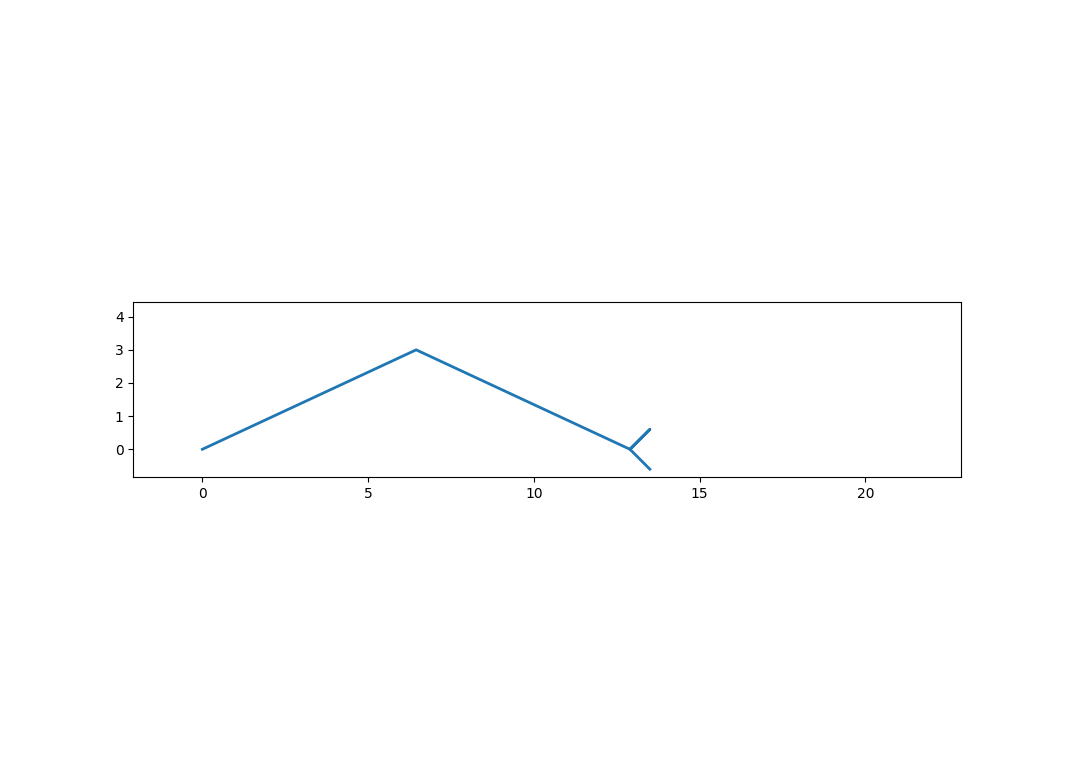

interactive(children=(IntSlider(value=10, description='l1_v', max=30, min=-10), FloatSlider(value=0.4, descrip…

In [6]:
init = evaluate()
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot()
mechanism = ax.plot(init['x'],init['y'],lw =2)
ax.set_aspect('equal')
ax.margins(0.1)



def update(l1_v=10,l2_v=0.4,h1_v=4, h2_v=0.8,k_theta_v=1,k_phi_v=1,k_L_v=1,d1_v =0):
    
    mechanism[0].set_ydata(evaluate(l1_v,l2_v,h1_v,h2_v,k_theta_v,k_phi_v,k_L_v,d1_v)['y'])
    mechanism[0].set_xdata(evaluate(l1_v,l2_v,h1_v,h2_v,k_theta_v,k_phi_v,k_L_v,d1_v)['x'])
    fig.canvas.draw_idle()

interact(update,l1_v=10,
         l2_v=0.4,
         h1_v=4,
         h2_v=0.8,
         k_theta_v=1,
         k_phi_v=1,
         k_L_v=1,
         d1_v =0)
evaluate(d1_v= 0.5)['y']
plt.show()



<IPython.core.display.Javascript object>


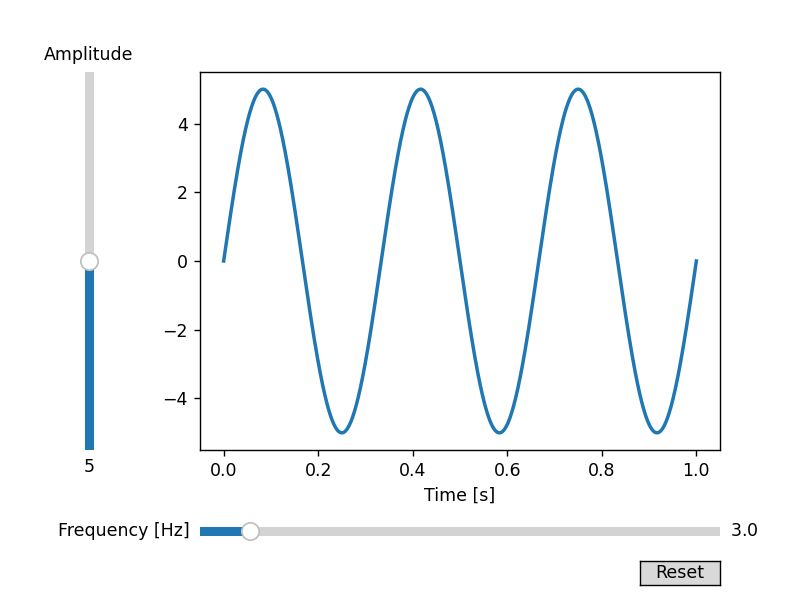

In [7]:
from matplotlib.widgets import Slider, Button

# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()